<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Thu Jul 13 06:55:05 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.23                 Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   42C    P8               4W /  50W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


2.0.1+cu118
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

* Autonomous Driving - Tesla
* Healthcare - Apple Eye Health Detection
* Agriculture - Disease Detection and weed removal


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting is a problem in machine learning where the model fits too closely to the training data that it does not generalize well to additional data (test data).

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

* Early Stopping - Stopping the training of the model before it starts learning noise from the data.
* Pruning - Selecting the most important features from the data (feature selection)
* Data Augmentation - Creating additional data which very slightky varies from the training data every time we train it.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision.transforms import ToTensor
train_data = torchvision.datasets.MNIST(root="dig_data",
                                              train=True,
                                              transform=ToTensor(),
                                              target_transform=None,
                                              download=True)
test_data = torchvision.datasets.MNIST(root="dig_data",
                                             train=False,
                                             transform=ToTensor(),
                                             target_transform=None,
                                             download=True)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [4]:
len(train_data.data), len(test_data.data)

(60000, 10000)

In [5]:
class_names = train_data.classes

In [6]:
import matplotlib.pyplot as plt

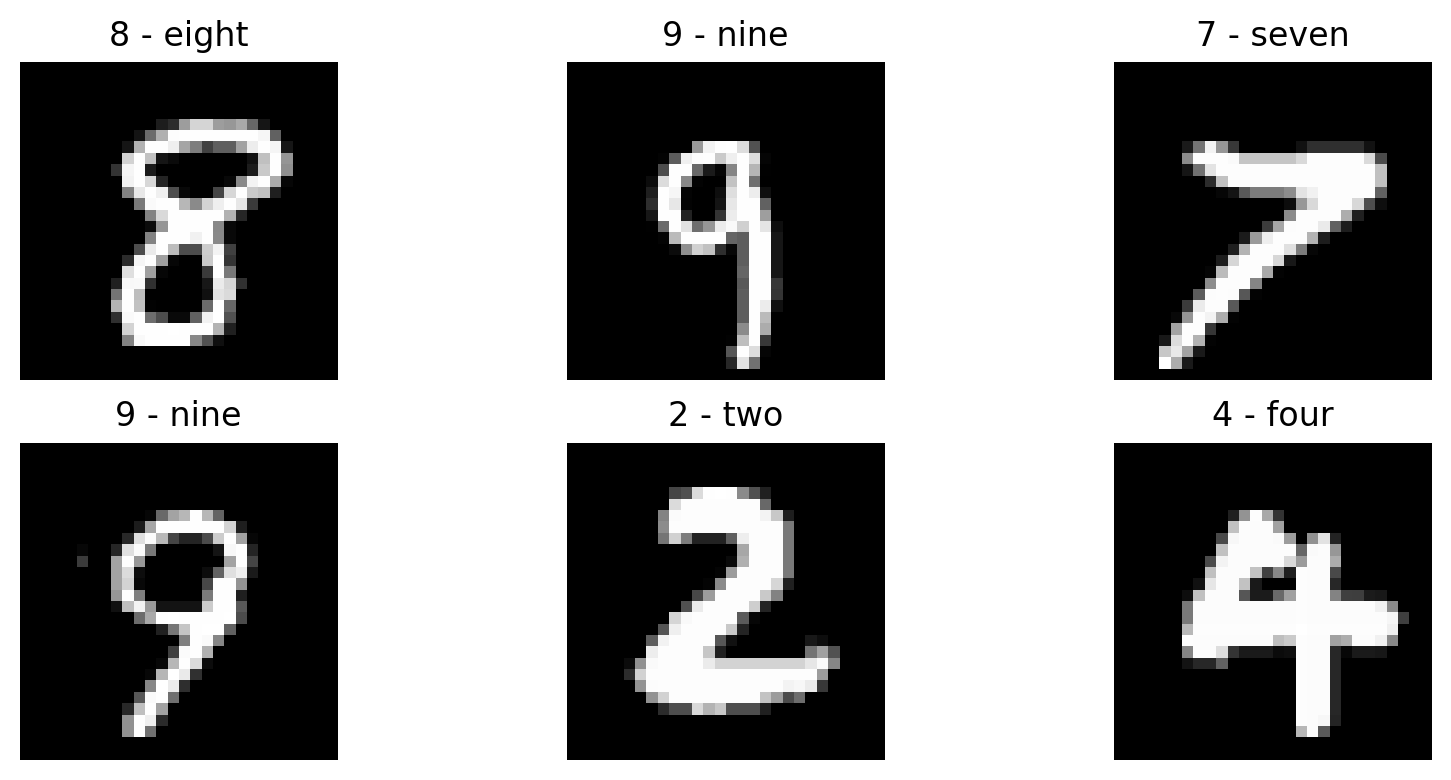

In [7]:
n_rows = 3
n_cols = 3
plt.figure(figsize=(10, 7), dpi=200)
for i in range(6):
    random_idx = torch.randint(0, len(train_data), [1]).item()
    img, label = train_data[random_idx]
    plt.subplot(n_rows, n_cols, i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [8]:
BATCH_SIZE = 32
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
class MNISTModelV2(torch.nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.cnn_block_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=3)
        )
        self.cnn_block_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=3, stride=3)
        )
        self.classifier = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=hidden_units * 9,
                            out_features=output_shape)
        )
    def forward(self, x):
        x = self.cnn_block_1(x)
        # print(x.shape)
        x = self.cnn_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [10]:
model_0_cpu = MNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

In [11]:
dummy_img = torch.randn((1, 1, 28, 28))
model_0_cpu(dummy_img)

tensor([[-0.0963,  0.0354, -0.0139,  0.0781,  0.1057, -0.0418, -0.0735,  0.0659,
          0.0056,  0.0664]], grad_fn=<AddmmBackward0>)

In [12]:
img.shape

torch.Size([1, 28, 28])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [13]:
from helper_functions import accuracy_fn

In [14]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0_cpu.parameters(),
                            lr=0.1)

In [15]:
from timeit import default_timer as timer
def print_time(start, end, device):
    total_time = end - start
    print(f"The total time taken is {total_time} on device: {device}")
    return total_time

In [16]:
len(train_dataloader)

1875

In [17]:
from tqdm.auto import tqdm
epochs = 5
# train_dataloader, test_dataloader = train_dataloader.to(device), test_dataloader.to(device)
start_time_on_cpu = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}/{epochs}")
    train_loss = 0
    train_accuracy = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0_cpu.train()
        train_logits = model_0_cpu(X)
        train_preds = train_logits.argmax(axis=1)
        loss = loss_fn(train_logits, y)
        train_loss += loss
        train_accuracy += accuracy_fn(y, train_preds)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    train_loss /= len(train_dataloader)
    train_accuracy /= len(train_dataloader)
    model_0_cpu.eval()
    with torch.inference_mode():
        test_loss = 0
        test_accuracy = 0
        for X_test, y_test in test_dataloader:
            test_logits = model_0_cpu(X_test)
            test_preds = test_logits.argmax(dim=1)
            test_loss += loss_fn(test_logits, y_test)
            test_accuracy += accuracy_fn(y_test, test_preds)
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.4f} | Train accuracy: {train_accuracy:.2f}% | Test loss: {test_loss:.4f} | Test accuracy: {test_accuracy:.4f}%")
end_time_on_cpu = timer()
total_time_on_cpu = print_time(start=start_time_on_cpu, end=end_time_on_cpu, device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0/5
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4587 | Train accuracy: 84.44% | Test loss: 0.1090 | Test accuracy: 96.4557%
Epoch : 1/5
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.1105 | Train accuracy: 96.47% | Test loss: 0.0858 | Test accuracy: 97.0547%
Epoch : 2/5
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.0855 | Train accuracy: 97.28% | Test loss: 0.0687 | Test accuracy: 97.8235%
Epoch : 3/5
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.0738 | Train accuracy: 97.67% | Test loss: 0.0656 | Test acc

In [18]:
model_0_gpu = MNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

In [19]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0_gpu.parameters(),
                            lr=0.1)

In [20]:
from tqdm.auto import tqdm
epochs = 5
start_time_on_gpu = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}/{epochs}")
    train_loss = 0
    train_accuracy = 0
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        model_0_gpu.train()
        train_logits = model_0_gpu(X)
        train_preds = train_logits.argmax(axis=1)
        loss = loss_fn(train_logits, y)
        train_loss += loss
        train_accuracy += accuracy_fn(y, train_preds)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
    train_loss /= len(train_dataloader)
    train_accuracy /= len(train_dataloader)
    model_0_gpu.eval()
    with torch.inference_mode():
        test_loss = 0
        test_accuracy = 0
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            y_test.to(device)
            test_logits = model_0_gpu(X_test)
            test_preds = test_logits.argmax(dim=1)
            test_loss += loss_fn(test_logits, y_test)
            test_accuracy += accuracy_fn(y_test, test_preds)
        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.4f} | Train accuracy: {train_accuracy:.2f}% | Test loss: {test_loss:.4f} | Test accuracy: {test_accuracy:.4f}%")
end_time_on_gpu = timer()
total_time_on_gpu = print_time(start=start_time_on_gpu, end=end_time_on_gpu, device="cpu")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0/5
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4095 | Train accuracy: 85.97% | Test loss: 0.0994 | Test accuracy: 96.9549%
Epoch : 1/5
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.0874 | Train accuracy: 97.25% | Test loss: 0.0911 | Test accuracy: 97.2344%
Epoch : 2/5
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.0651 | Train accuracy: 97.97% | Test loss: 0.0713 | Test accuracy: 97.6438%
Epoch : 3/5
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.0552 | Train accuracy: 98.33% | Test loss: 0.0473 | Test acc

In [21]:
print(total_time_on_cpu)

134.50097359999927


In [22]:
print(total_time_on_gpu)

74.58957290000399


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [23]:
def make_predictions(model, data, device=device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [24]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
print(test_samples[0].shape)

torch.Size([1, 28, 28])


In [25]:
pred_probs = make_predictions(model_0_gpu, data=test_samples)

In [26]:
pred_classes = pred_probs.argmax(dim=1)

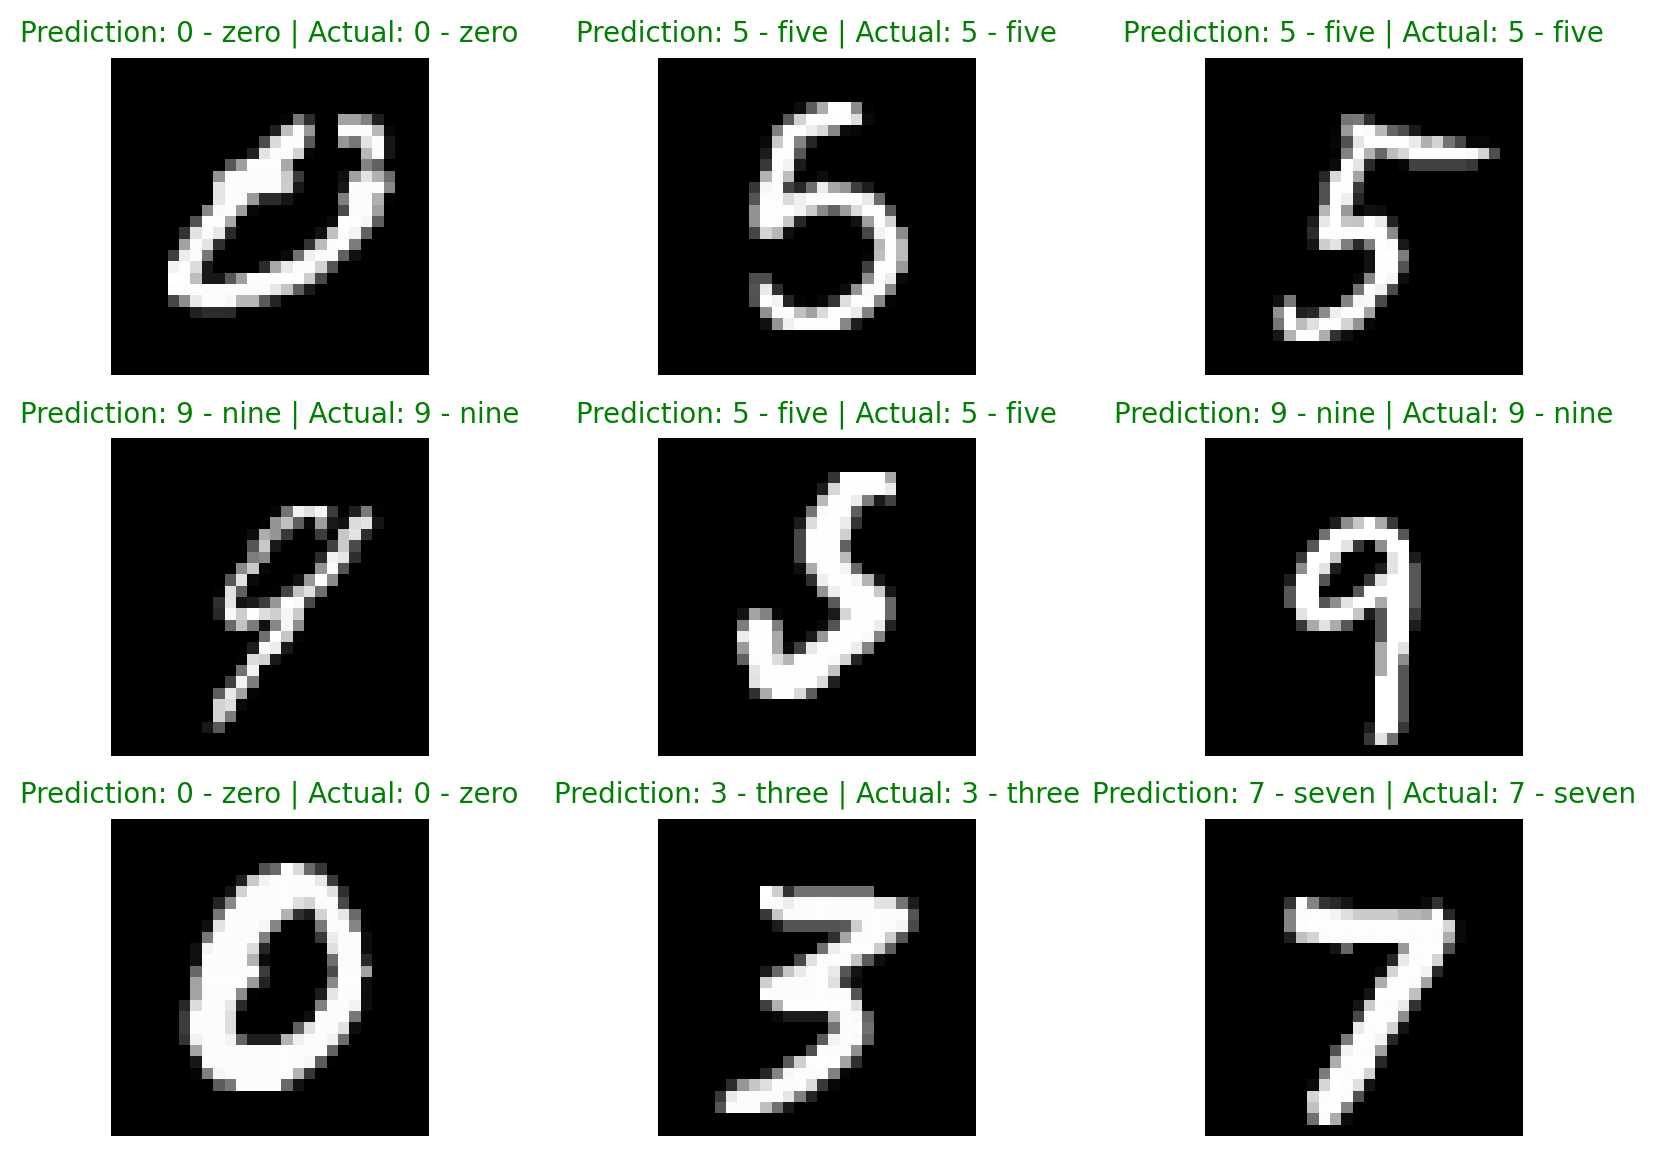

In [27]:
import matplotlib.pyplot as plt
nrows = 3
ncols = 3
plt.figure(figsize=(10, 7), dpi=200)
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap="gray")
    class_label = class_names[test_labels[i]]
    preds = class_names[pred_classes[i]]
    title_text = f"Prediction: {preds} | Actual: {class_label}"
    if class_label == preds:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, color="r")
    plt.axis(False)


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [28]:
y_preds = []
for X, y in tqdm(test_dataloader, desc="Making Predictions"):
    X, y = X.to(device), y.to(device)
    with torch.inference_mode():
        y_pred_logit = model_0_gpu(X)
        y_pred = torch.softmax(y_pred_logit.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.to("cpu"))
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

In [29]:
test_data.targets

tensor([7, 2, 1,  ..., 4, 5, 6])

In [30]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
cm = confmat(y_pred_tensor, test_data.targets)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

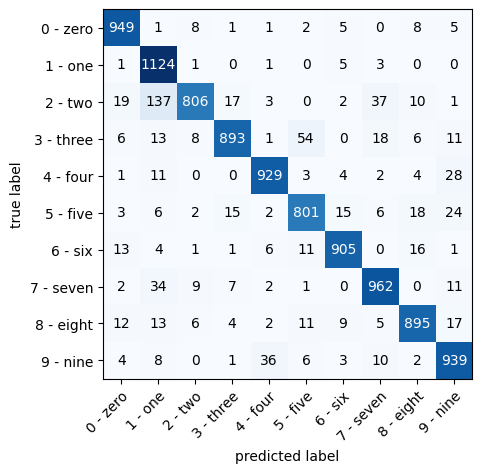

In [31]:
plot_confusion_matrix(cm.numpy(), class_names=class_names)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [37]:
rand_img = torch.randn((1, 3, 64, 64))
rand_img.shape

torch.Size([1, 3, 64, 64])

In [42]:
cnv_2d = torch.nn.Conv2d(in_channels=3, out_channels=10, kernel_size=5, stride=3)
rnd_conv = cnv_2d(rand_img)

In [43]:
rnd_conv.shape

torch.Size([1, 10, 20, 20])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [33]:
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train_data = datasets.FashionMNIST(root="data",
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           target_transform=None,
                                           download=True)
fashion_mnist_test_data = datasets.FashionMNIST(root="data",
                                                train=False,
                                                transform=transforms.ToTensor(),
                                                target_transform=None,
                                                download=True)

In [34]:
fashion_mnist_classnames = fashion_mnist_train_data.classes
fashion_mnist_classnames

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [44]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
fashion_mnist_train_dataloader = DataLoader(fashion_mnist_train_data, batch_size=BATCH_SIZE, shuffle=True)
fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test_data, shuffle=False, batch_size=BATCH_SIZE)

In [45]:
model_1 = MNISTModelV2(input_shape=1,
                       hidden_units=10,
                       output_shape=len(fashion_mnist_classnames))

In [49]:
model_1.to(device=device)

MNISTModelV2(
  (cnn_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (cnn_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=90, out_features=10, bias=True)
  )
)

In [50]:
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

In [51]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(task="multiclass", num_classes=len(fashion_mnist_classnames)).to(device) 

# Setup training/testing loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0 

  ### Training
  model_1.train()
  for batch, (X_train, y_train) in enumerate(fashion_mnist_train_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    # Forward pass and loss
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss
    train_acc += acc_fn(y_pred, y_train)

    # Backprop and gradient descent
    optimizer.zero_grad()
    loss.backward() 
    optimizer.step()

  # Adjust the loss/acc (find the loss/acc per epoch)
  train_loss /= len(fashion_mnist_train_dataloader)
  train_acc /= len(fashion_mnist_train_dataloader)

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(fashion_mnist_test_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      # Forward pass and loss
      y_pred_test = model_1(X_test)
      test_loss = loss_fn(y_pred_test, y_test)
      test_loss_total += test_loss

      test_acc += acc_fn(y_pred_test, y_test)
  
    # Adjust the loss/acc (find the loss/acc per epoch)
    test_loss /= len(fashion_mnist_test_dataloader)
    test_acc /= len(fashion_mnist_test_dataloader)
    
  # Print out what's happening
  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.677 | Train acc: 0.38 | Test loss: 233.125 | Test acc: 0.73
Epoch: 1 | Train loss: 0.627 | Train acc: 0.77 | Test loss: 189.559 | Test acc: 0.77
Epoch: 2 | Train loss: 0.525 | Train acc: 0.81 | Test loss: 161.447 | Test acc: 0.81
Epoch: 3 | Train loss: 0.480 | Train acc: 0.82 | Test loss: 153.915 | Test acc: 0.82
Epoch: 4 | Train loss: 0.450 | Train acc: 0.84 | Test loss: 140.445 | Test acc: 0.84


In [52]:
test_preds = []
with torch.inference_mode():
    model_1.eval()
    for X_test, y_test in tqdm(test_dataloader):
        y_logits = model_1(X_test.to(device))
        y_preds = torch.argmax(y_logits, dim=1)
        test_preds.append(y_preds)
test_preds = torch.cat(test_preds).cpu()

  0%|          | 0/313 [00:00<?, ?it/s]

In [55]:
import numpy as np
wrong_preds = np.where(test_preds != fashion_mnist_test_data.targets)[0]


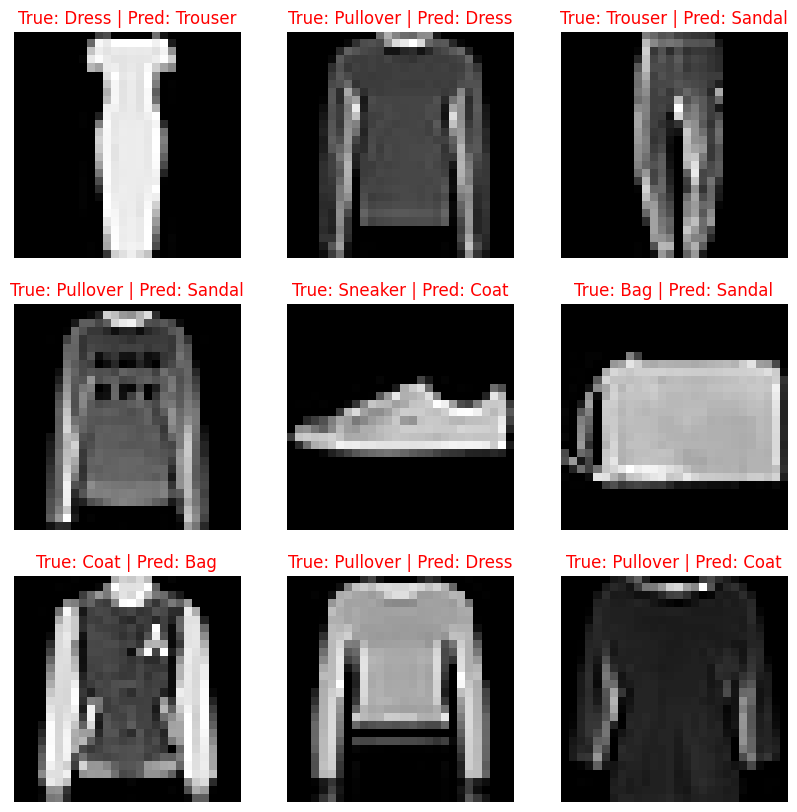

In [59]:
import random
random_selection = random.sample(list(wrong_preds), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = fashion_mnist_classnames[fashion_mnist_test_data[idx][1]]
  pred_label = fashion_mnist_classnames[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test_data[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);